<a href="https://colab.research.google.com/github/Uyen-27/Student-Performance-Prediction-Using-Logistic-Regression/blob/main/Student_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Performance Prediction Using Logistic Regression**

Student: Ho Nguyen Phuong Uyen

IRN: 2332310043

# **Introduction**

**1. Project Overview**

This project aims to analyze and predict student academic performance using machine learning techniques, specifically **Logistic Regression**. By examining various factors that influence student success, we can identify at-risk students *early* and provide targeted interventions to improve educational outcomes.

**2. Objective**

* Analyze factors affecting student exam scores
* Build a predictive model to classify students into "Good" (≥70) and "Not Good" (<70) performance categories
* Identify the most influential features contributing to student success
* Provide actionable insights for educators and policymakers

**3. Dataset Description**

The dataset contains 6,607 student records with 20 variables capturing various aspects of student life and academic environment.


***Numerical Variables (7 features):***


* `Hours_Studied`: Weekly study hours
* `Attendance`: Class attendance percentage
* `Sleep_Hours`: Average daily sleep hours
* `Previous_Scores`: Scores from previous assessments
* `Tutoring_Sessions`: Number of tutoring sessions attended
* `Physical_Activity`: Hours of physical activity per week
* `Exam_Score`: Final exam score (Target variable)

***Categorical Variables (13 features):***

* `Parental_Involvement`: Level of parental engagement (Low/Medium/High)
* `Access_to_Resources`: Availability of learning resources (Low/Medium/High)
* `Extracurricular_Activities`: Participation in extracurricular activities (Yes/No)
* `Motivation_Level`: Student's motivation level (Low/Medium/High)
* `Internet_Access`: Access to internet (Yes/No)
* `Family_Income`: Family income level (Low/Medium/High)
* `Teacher_Quality`: Quality of teachers (Low/Medium/High)
* `School_Type`: Type of school (Public/Private)
* `Peer_Influence`: Influence from peers (Positive/Neutral/Negative)
* `Learning_Disabilities`: Presence of learning disabilities (Yes/No)
* `Parental_Education_Level`: Parents' education level (High School/College/Postgraduate)
* `Distance_from_Home`: Distance from home to school (Near/Moderate/Far)
* `Gender`: Student gender (Male/Female)

# **Import Libraries**

We import essential Python libraries for data manipulation, visualization, and machine learning:

* pandas & numpy: Data manipulation and numerical operations
* matplotlib & seaborn: Data visualization

* sklearn: Machine learning algorithms and evaluation metrics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, recall_score, precision_score, f1_score

import warnings
warnings.filterwarnings("ignore")


# **Data Loading and Initial Exploration**

In [2]:
#Uppload dataset
from google.colab import files
uploaded = files.upload()

Saving StudentPerformanceFactors.csv to StudentPerformanceFactors.csv


In [3]:
#Load data from csv file into dataframe
data = pd.read_csv('StudentPerformanceFactors.csv')

In [4]:
#Show fisrt 5 rows of dataframe
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [5]:
#Check informations of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [6]:
#Get the number of rows and columns in the dataframe
data.shape

(6607, 20)

The dataset contains 6,607 rows and 20 columns with a mix of numerical (7) and categorical (13) variables.

In [7]:
#Show statistical summary
data.describe(include='all')

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
count,6607.000000,6607.000000,6607,6607,6607,6607.00000,6607.000000,6607,6607,6607.000000,6607,6529,6607,6607,6607.000000,6607,6517,6540,6607,6607.000000
unique,NaN,NaN,3,3,2,NaN,NaN,3,2,NaN,3,3,2,3,NaN,2,3,3,2,NaN
top,NaN,NaN,Medium,Medium,Yes,NaN,NaN,Medium,Yes,NaN,Low,Medium,Public,Positive,NaN,No,High School,Near,Male,NaN
freq,NaN,NaN,3362,3319,3938,NaN,NaN,3351,6108,NaN,2672,3925,4598,2638,NaN,5912,3223,3884,3814,NaN
mean,19.975329,79.977448,NaN,NaN,NaN,7.02906,75.070531,NaN,NaN,1.493719,NaN,NaN,NaN,NaN,2.967610,NaN,NaN,NaN,NaN,67.235659
std,5.990594,11.547475,NaN,NaN,NaN,1.46812,14.399784,NaN,NaN,1.230570,NaN,NaN,NaN,NaN,1.031231,NaN,NaN,NaN,NaN,3.890456
min,1.000000,60.000000,NaN,NaN,NaN,4.00000,50.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,55.000000
25%,16.000000,70.000000,NaN,NaN,NaN,6.00000,63.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,65.000000
50%,20.000000,80.000000,NaN,NaN,NaN,7.00000,75.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,67.000000
75%,24.000000,90.000000,NaN,NaN,NaN,8.00000,88.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,69.000000


The `describe(include='all')` function provides statistical insights into the distribution of numerical variables, including unique, top, frequency, mean, standard deviation, and quartile values.

In [8]:
#Check how many values appear in Exam_Score cloumn
data['Exam_Score'].value_counts()

,count
Exam_Score,
68,759
66,751
67,717
65,679
69,624
70,542
64,501
71,408
63,371


We can observe that the majority of student scores fall within the range of 68-74 points.

# **Exploratory Data Analysis**

We identified missing values in three categorical columns. Since the missing data represents less than 1.5% of total records, we chose to impute with the mode (most frequent value) to preserve the original data distribution.

In [9]:
#Check missing values
data.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


With initial inspection reveals missing values in three columns:

`Teacher_Quality`: 78 missing values
`Parental_Education_Level`: 90 missing values
`Distance_from_Home`: 67 missing values

In [10]:
#Handle missing values by fill with mode
data['Teacher_Quality'].fillna(data['Teacher_Quality'].mode()[0], inplace=True)
data['Parental_Education_Level'].fillna(data['Parental_Education_Level'].mode()[0], inplace=True)
data['Distance_from_Home'].fillna(data['Distance_from_Home'].mode()[0], inplace=True)

In [11]:
#Check missing values again to make sure there are no missing values
data.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [12]:
#Check duplicated
data.duplicated().sum()

np.int64(0)

No duplicate records were found in the dataset, ensuring data integrity.

# **Data Cleaning**

In [13]:
#Show how many values appear in Internet_Access column
data['Internet_Access'].value_counts()

,count
Internet_Access,
Yes,6108
No,499


In [14]:
#Check how many unique values which appear in Internet_Áccess column
data['Internet_Access'].nunique()

2

In [15]:
#Show how many values appear in Learning_Disabilities column
data['Learning_Disabilities'].value_counts()

,count
Learning_Disabilities,
No,5912
Yes,695


In [16]:
#Check how many unique values which appear in Learning_Disabilities column
data['Learning_Disabilities'].nunique()

2

In [17]:
#Drop 2 cloumns directly in dataframe
data.drop(['Internet_Access', 'Learning_Disabilities'], axis=1, inplace=True)

After examining the `Internet_Access` and `Learning_Disabilities` columns, we found they have only 2 unique values each with minimal variation. These columns were dropped to reduce dimensionality and potential multicollinearity issues.

In [18]:
#Check first 5 rows and all columns that there are no Internet_Access and Learning_Disabilities column
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,0,Low,Medium,Public,Positive,3,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,2,Medium,Medium,Public,Negative,4,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,2,Medium,Medium,Public,Neutral,4,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,1,Medium,Medium,Public,Negative,4,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,3,Medium,High,Public,Neutral,4,College,Near,Female,70


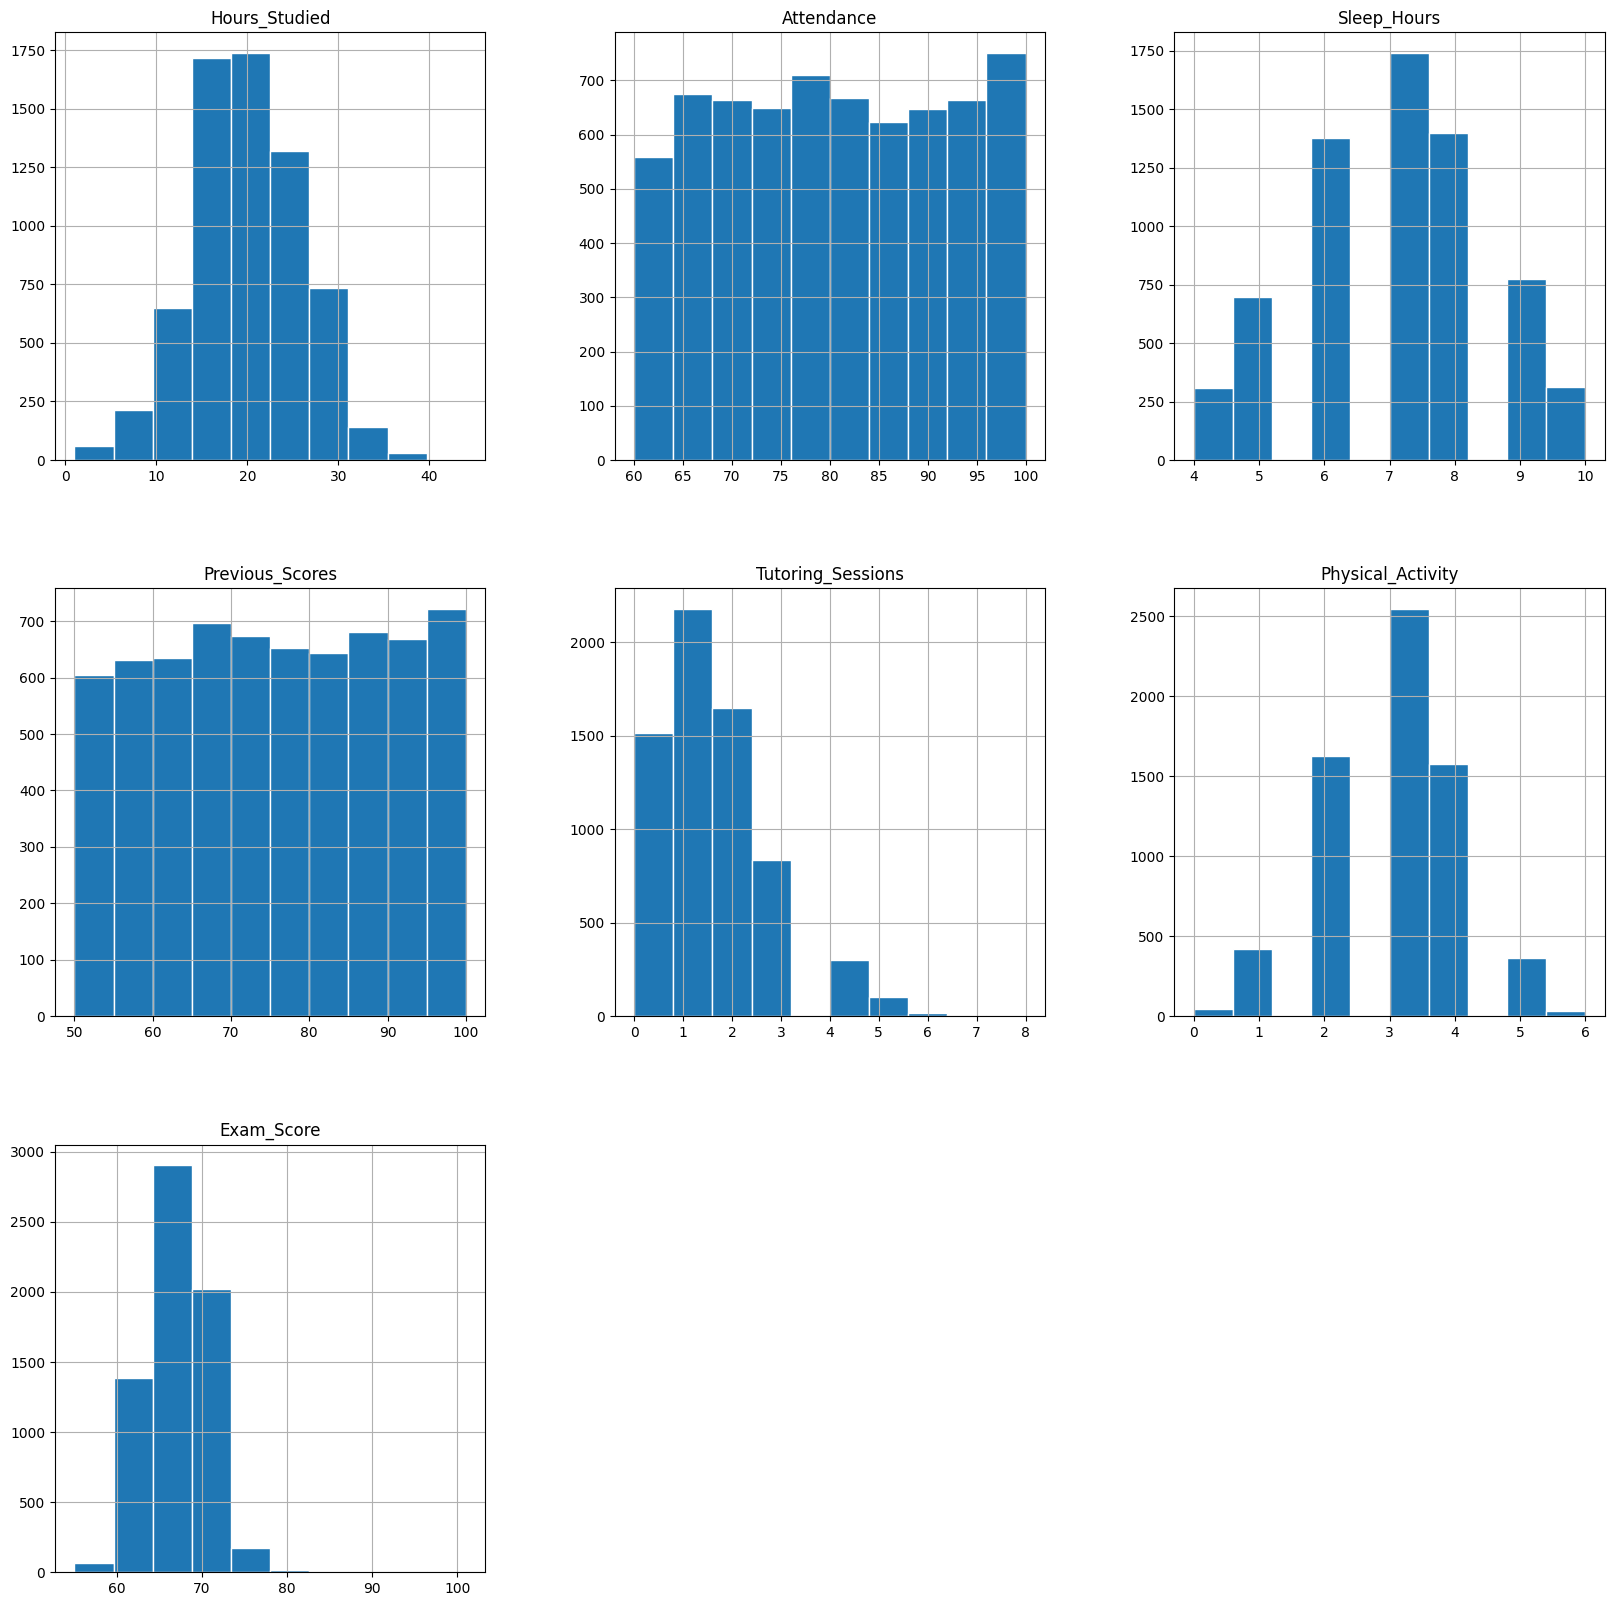

In [19]:
#raws histograms for all numeric columns in the DataFrame.
data.hist(edgecolor='white', figsize=(20, 20));

Histograms were plotted for all numerical variables to understand their distributions. Most variables show relatively normal distributions, which is favorable for logistic regression modeling.


# **Numerical Variables**

In [20]:
#Filter numeric columns and preview the first 5 rows.
data_num = data.select_dtypes(include=['int64', 'float64'])
data_num.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
0,23,84,7,73,0,3,67
1,19,64,8,59,2,4,61
2,24,98,7,91,2,4,74
3,29,89,8,98,1,4,71
4,19,92,6,65,3,4,70


In [21]:
#Show all index columns name
data_num.columns

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')

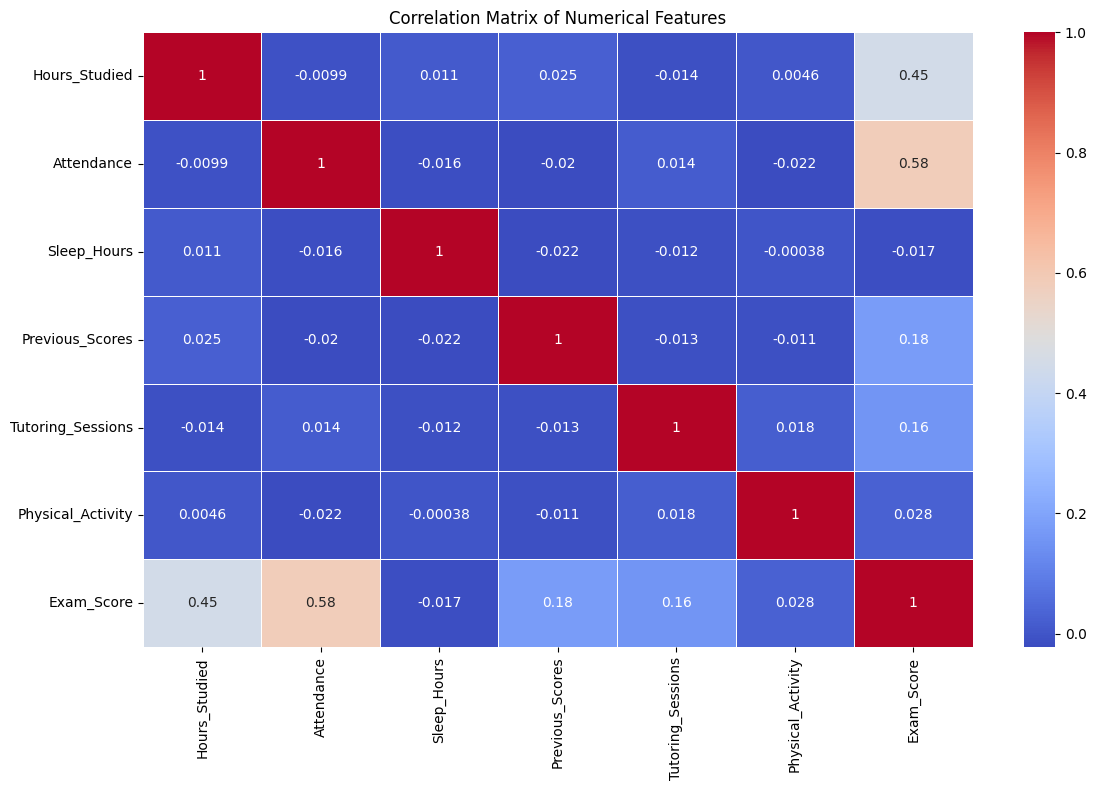

In [22]:
#Draws heatmap to see the correlation of numerical variables
plt.figure(figsize=(12, 8))
correlation_matrix = data_num.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

A correlation heatmap was generated to visualize relationships between numerical features. Key findings:

Strong positive correlations with Exam_Score:

* `Hours_Studied`: Higher study hours correlate with better performance
* `Attendance`: Regular attendance positively impacts scores
* `Previous_Scores`: Past performance is a strong predictor of future success


Moderate correlations:
 * `Tutoring_Sessions` shows moderate positive correlation with exam scores

Weak correlations:
* `Sleep_Hours` and `Physical_Activity` show relatively weak direct correlations with exam performance

# **Categorical Variables**

Categorical variables were analyzed using frequency distributions to understand the composition of the student population across different categories.

In [23]:
#Filter object columns and preview the first 5 rows.
data_cat = data.select_dtypes(include=['object'])
data_cat.head()

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Parental_Education_Level,Distance_from_Home,Gender
0,Low,High,No,Low,Low,Medium,Public,Positive,High School,Near,Male
1,Low,Medium,No,Low,Medium,Medium,Public,Negative,College,Moderate,Female
2,Medium,Medium,Yes,Medium,Medium,Medium,Public,Neutral,Postgraduate,Near,Male
3,Low,Medium,Yes,Medium,Medium,Medium,Public,Negative,High School,Moderate,Male
4,Medium,Medium,Yes,Medium,Medium,High,Public,Neutral,College,Near,Female


In [24]:
#Show statistic summary by transpose
data_cat.describe().T

,count,unique,top,freq
Parental_Involvement,6607,3,Medium,3362
Access_to_Resources,6607,3,Medium,3319
Extracurricular_Activities,6607,2,Yes,3938
Motivation_Level,6607,3,Medium,3351
Family_Income,6607,3,Low,2672
Teacher_Quality,6607,3,Medium,4003
School_Type,6607,2,Public,4598
Peer_Influence,6607,3,Positive,2638
Parental_Education_Level,6607,3,High School,3313
Distance_from_Home,6607,3,Near,3951


# **Feature Engineering**

The continuous `Exam_Score` variable was transformed into a binary classification target:

* 1 (Good): Exam_Score ≥ 70
* 0 (Not Good): Exam_Score < 70

This threshold was chosen based on common academic standards where 70% typically represents a passing or satisfactory grade.

In [25]:
#Create binary target variable then count values appear
data["Performance_Binary"] = (data["Exam_Score"] >= 70).astype(int)
data["Performance_Binary"].value_counts()


,count
Performance_Binary,
0,4982
1,1625


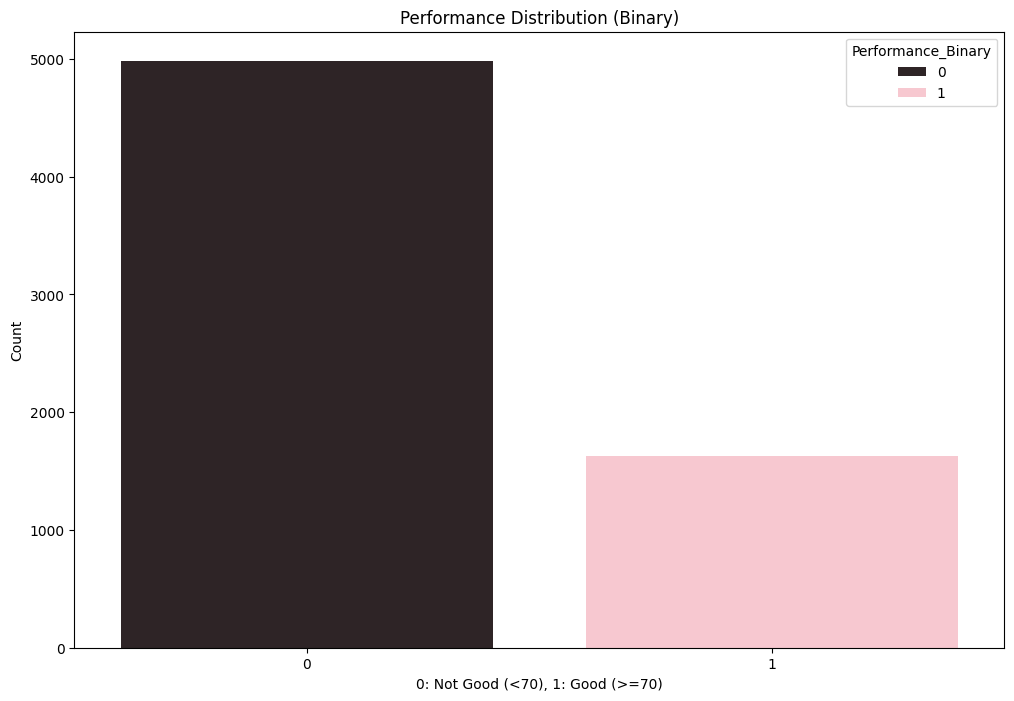

In [26]:
#Visualize a bar chart for target distribution (Performance_Binary)
plt.figure(figsize=(12, 8))
sns.countplot(x='Performance_Binary', hue='Performance_Binary', data=data, color=('pink'))
plt.title('Performance Distribution (Binary)')
plt.xlabel('0: Not Good (<70), 1: Good (>=70)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

The target variable distribution shows:

* Class 0 (Not Good): ~75% of students
* Class 1 (Good): ~25% of students

This indicates a moderate class imbalance that should be considered during model evaluation

# **Logistic Regression modelling**

In [27]:
#Show first 5 rows of dataframe
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Performance_Binary
0,23,84,Low,High,No,7,73,Low,0,Low,Medium,Public,Positive,3,High School,Near,Male,67,0
1,19,64,Low,Medium,No,8,59,Low,2,Medium,Medium,Public,Negative,4,College,Moderate,Female,61,0
2,24,98,Medium,Medium,Yes,7,91,Medium,2,Medium,Medium,Public,Neutral,4,Postgraduate,Near,Male,74,1
3,29,89,Low,Medium,Yes,8,98,Medium,1,Medium,Medium,Public,Negative,4,High School,Moderate,Male,71,1
4,19,92,Medium,Medium,Yes,6,65,Medium,3,Medium,High,Public,Neutral,4,College,Near,Female,70,1


Features (X) and target (y) were separated, excluding the original `Exam_Score` and the newly created `Performance_Binary` from features.


In [28]:
#Prepare features and target
X=data.drop(['Exam_Score', 'Performance_Binary'], axis=1)
y=data['Performance_Binary']

One-Hot Encoding was applied to convert categorical variables into numerical format suitable for machine learning algorithms. The `drop_first=True` parameter prevents multicollinearity by dropping one category per feature.


In [29]:
#Encode categorical variables using One-Hot Encoding
categorical_cols = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

The data was split into training (70%) and testing (30%) sets with stratification to maintain the original class distribution in both sets.


In [30]:
#Train and test split into 70/30
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)


StandardScaler was applied to normalize features, ensuring all variables contribute equally to the model regardless of their original scale.


In [31]:
#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

A Logistic Regression model was trained on the scaled training data.


In [32]:
#Build Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [33]:
#Predictions for target
y_pred = lr_model.predict(X_test_scaled)
y_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

In [34]:
#Calculate key evaluation metrics (accuracy, precision, recall, F1, and ROC-AUC) to assess the logistic regression model's performance.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

We evaluated the model using Accuracy, Precision, Recall, F1-Score, and ROC-AUC.

Accuracy measures overall correctness, while Precision and Recall provide class-specific insights.

F1-Score offers a balanced metric for imbalanced datasets.

ROC-AUC shows the model’s ability to distinguish between 'Good' and 'Not Good' students across different probability thresholds.

In [35]:
#Evaluation Metrics
pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Score': [accuracy, precision, recall, f1, roc_auc]
})

,Metric,Score
0,Accuracy,0.966717
1,Precision,0.950855
2,Recall,0.911885
3,F1 Score,0.930962
4,ROC AUC,0.981585


We evaluated the model using multiple metrics to get a comprehensive view of its performance:


In [36]:
#Display classification report
classification_report_output = classification_report(y_test, y_pred, target_names=['Not Good (<70)', 'Good (>=70)'])
print(classification_report_output)

                precision    recall  f1-score   support

Not Good (<70)       0.97      0.98      0.98      1495
   Good (>=70)       0.95      0.91      0.93       488

      accuracy                           0.97      1983
     macro avg       0.96      0.95      0.95      1983
  weighted avg       0.97      0.97      0.97      1983



Interpretation:

* The model performs exceptionally well for the majority class (Not Good) with 98% recall
* For the minority class (Good), the model achieves 91% recall, meaning 9% of good performers may be misclassified
* The weighted average accounts for class imbalance and shows overall strong performance

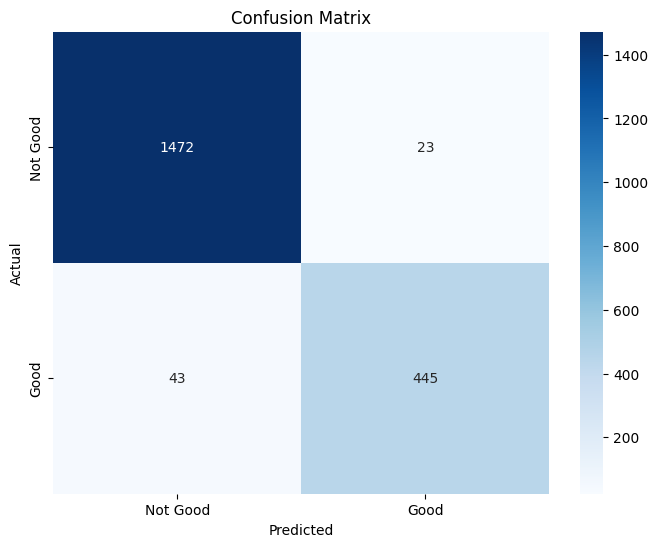

In [37]:
#Plot the confusion matrix to visualize the model’s classification performance.
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Good', 'Good'],
            yticklabels=['Not Good', 'Good'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


The confusion matrix reveals:

* True Negatives (TN): Students correctly predicted as "Not Good"
* True Positives (TP): Students correctly predicted as "Good"
* False Positives (FP): "Not Good" students incorrectly predicted as "Good"
* False Negatives (FN): "Good" students incorrectly predicted as "Not Good"

The low number of false predictions indicates the model generalizes well to unseen data.

In [38]:
#Displays the top 10 features ranked by their absolute coefficients from the logistic regression model
feature_importance = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Coefficient': lr_model.coef_[0]  # For binary or first class
}).sort_values('Coefficient', key=abs, ascending=False)

print("\n=== Top 10 Most Important Features ===")
feature_importance.head(10)


=== Top 10 Most Important Features ===


,Feature,Coefficient
1,Attendance,4.515024
0,Hours_Studied,3.644708
6,Parental_Involvement_Low,-1.569430
8,Access_to_Resources_Low,-1.538556
3,Previous_Scores,1.404124
4,Tutoring_Sessions,1.139009
19,Peer_Influence_Positive,1.097970
9,Access_to_Resources_Medium,-1.028131
11,Motivation_Level_Low,-0.967750
13,Family_Income_Low,-0.946941


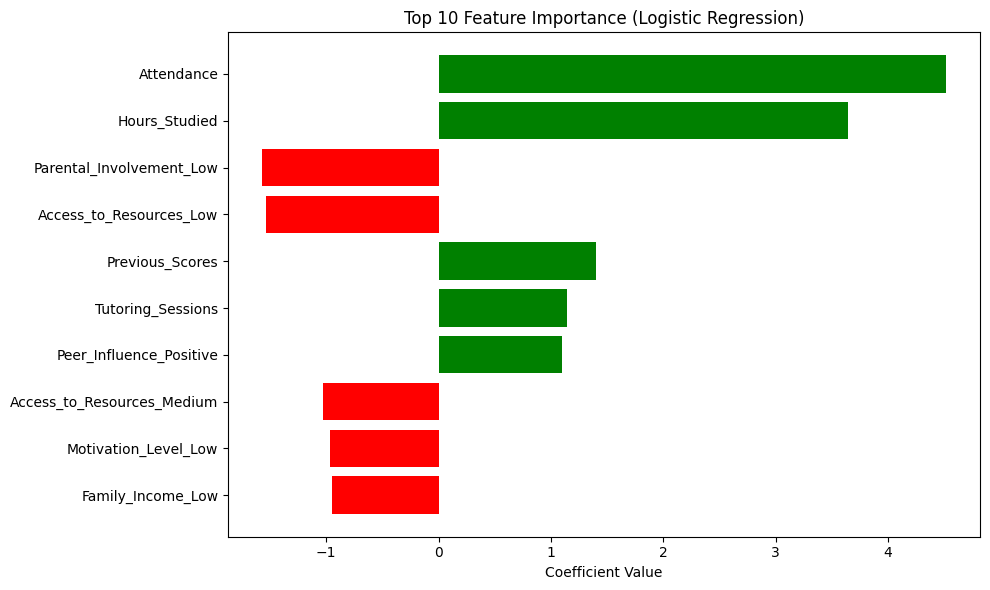

In [39]:
# Plot the top 10 important features (positive = green, negative = red).
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(10)
colors = ['green' if x > 0 else 'red' for x in top_features['Coefficient']]
plt.barh(top_features['Feature'], top_features['Coefficient'], color=colors)
plt.xlabel('Coefficient Value')
plt.title('Top 10 Feature Importance (Logistic Regression)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

The top 10 most influential features based on logistic regression coefficients:

Positive Coefficients (increase likelihood of "Good" performance):

* `Attendance`: Regular attendance significantly improves performance
* `Hours_Studied`: More study hours lead to better outcomes
* `Previous_Scores`: Historical performance is a strong predictor
* `Parental_Involvement_High`: Highly involved parents contribute to success

Negative Coefficients (decrease likelihood of "Good" performance):

* `Motivation_Level_Low`: Low motivation severely impacts performance
* `Peer_Influence_Negative`: Negative peer influence harms academic success
* `Family_Income_Low`: Financial constraints may affect educational resources

# **Conclusion**

**Summary of Findings**

This analysis successfully developed a Logistic Regression model to predict student academic performance with 97% accuracy and ROC-AUC of ~0.97, demonstrating excellent ability to distinguish between "Good" and "Not Good" performing students.

**Key Predictors of Student Success:**

* Positive factors: Attendance, Hours Studied, Previous Scores, and High Parental Involvement strongly increase the likelihood of good performance
* Negative factors: Low Motivation, Negative Peer Influence, and Low Family Income significantly decrease academic success

**Practical Implications**

Based on our findings, educational institutions should:

* Implement attendance monitoring and early intervention programs
* Encourage parental engagement in student learning
* Provide tutoring support and motivational counseling for at-risk students
* Create positive peer mentorship programs

**Limitations**

* Moderate class imbalance (75% Not Good vs 25% Good) may slightly affect minority class prediction
* The binary threshold of 70 is based on common standards but may vary across educational contexts
* Logistic Regression assumes linear relationships, which may not capture all complex patterns

**Suggestions for improvement:**
   - Apply class balancing (SMOTE or `class_weight='balanced`')
   - Try threshold tuning to improve Recall
   - Test non-linear models (Random Forest, XGBoost)
   - Hyperparameter tuning with GridSearchCV